 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [233]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [234]:
csv_whale=Path("whale_returns.csv")

In [235]:
# Reading whale returns
whales_df=pd.read_csv(csv_whale,index_col="Date",parse_dates=True,infer_datetime_format=True)
whales_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [236]:
# Count nulls
whales_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [237]:
# Drop nulls
whales_df.dropna(inplace=True)
whales_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [238]:
# Reading algorithmic returns
csv_algo=Path("algo_returns.csv")
algo_df=pd.read_csv(csv_algo,index_col="Date",parse_dates=True,infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [239]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [240]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [241]:
# Reading S&P TSX 60 Closing Prices
csv_tsx=Path("sp_tsx_history.csv")
sp_df=pd.read_csv(csv_tsx,index_col="Date",parse_dates=True,infer_datetime_format=True)
sp_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [242]:
# Check Data Types
sp_df.dtypes

Close    object
dtype: object

In [243]:
# Fix Data Types
sp_df['Close']=sp_df['Close'].str.replace('$','')
sp_df['Close']=sp_df['Close'].str.replace(',','')
sp_df['Close']=sp_df['Close'].astype('float')
sp_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [244]:
# Calculate Daily Returns
daily_returns_sp=sp_df.pct_change()
daily_returns_sp

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [245]:
# Drop nulls
daily_returns_sp.dropna(inplace=True)
daily_returns_sp

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [246]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_sp=daily_returns_sp.rename(columns={'Close':'TSX'})
daily_returns_sp

,TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [247]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_return=pd.concat([whales_df,algo_df,daily_returns_sp],axis='columns',join='inner')
combined_return.sort_index()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

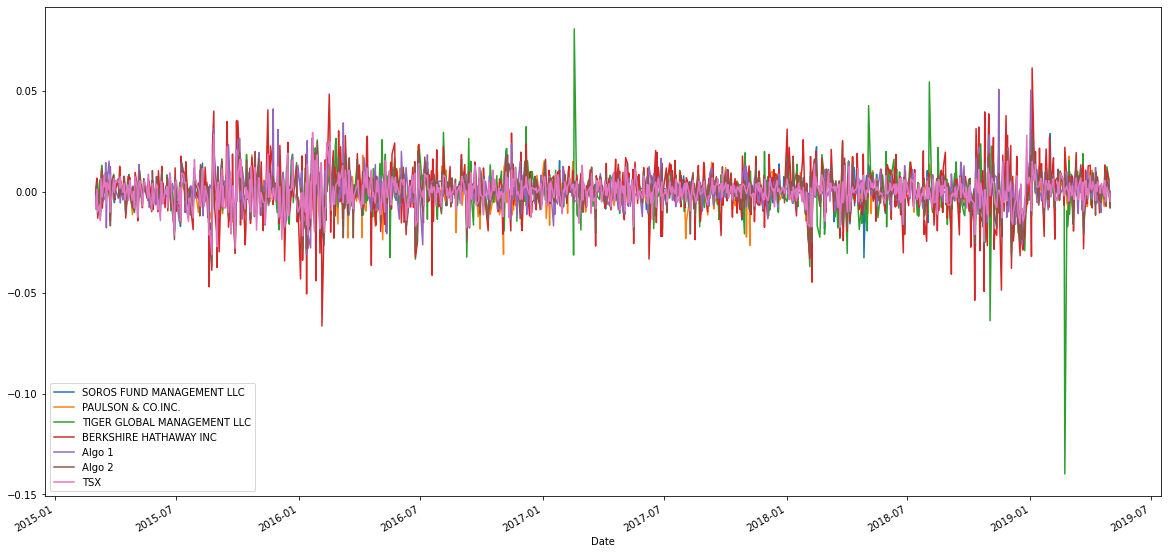

In [248]:
# Plot daily returns of all portfolios
combined_return.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

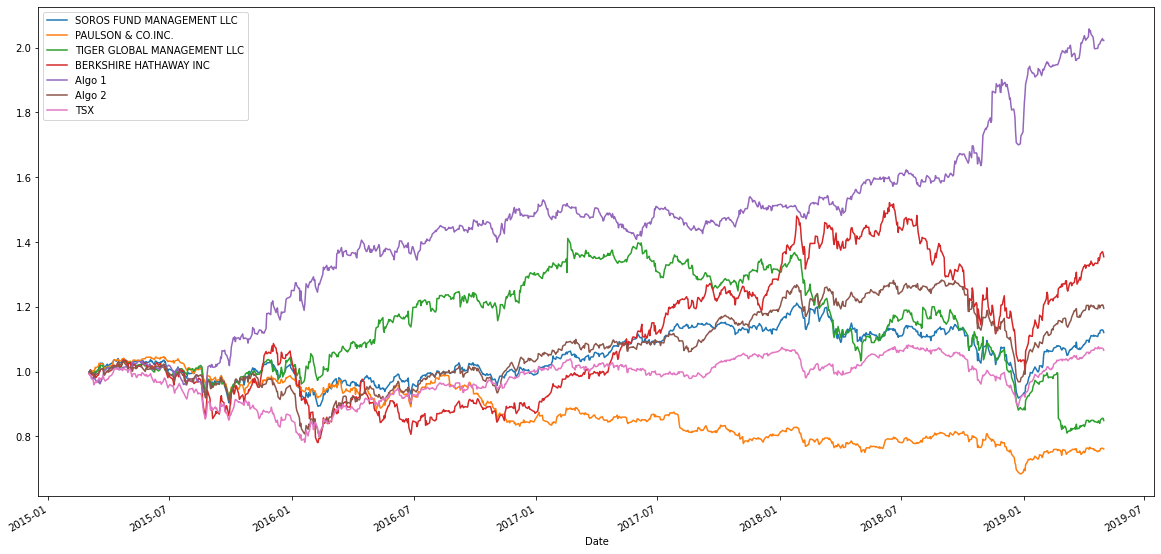

In [249]:
# Calculate cumulative returns of all portfolios
cumulative_returns=(1+combined_return).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

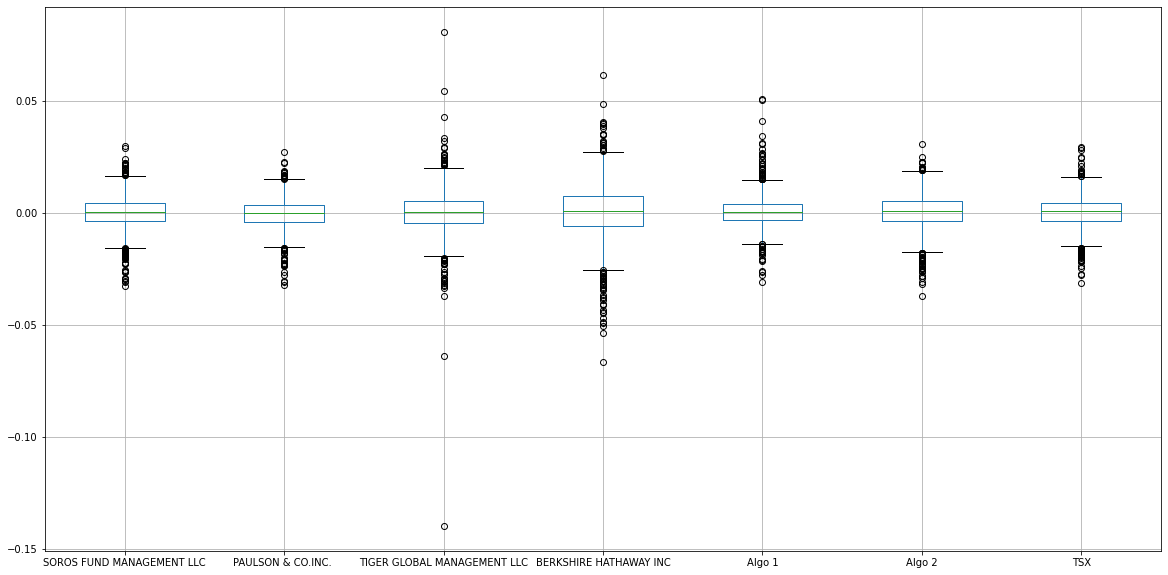

In [250]:
# Box plot to visually show risk
combined_return.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [251]:
# Calculate the daily standard deviations of all portfolios
daily_std_all=combined_return.std()
daily_std_all.sort_values()

PAULSON & CO.INC.              0.006982
TSX                            0.007034
Algo 1                         0.007589
SOROS FUND MANAGEMENT LLC      0.007828
Algo 2                         0.008326
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

<AxesSubplot:title={'center':'Standard Deviations'}>

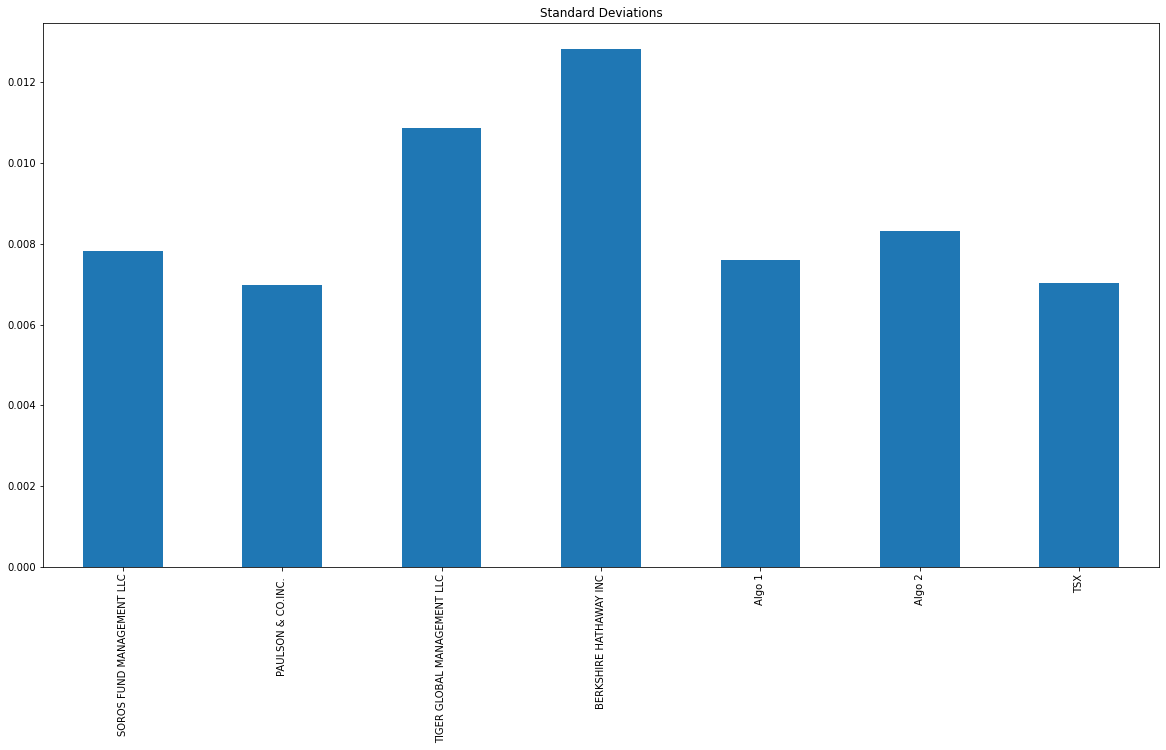

In [252]:
# Calculate  the daily standard deviation of S&P TSX 60
std_sp=combined_return["TSX"].std()

# Determine which portfolios are riskier than the S&P TSX 60
daily_std_all.plot(kind='bar',title="Standard Deviations",figsize=(20,10))

### Calculate the Annualized Standard Deviation

In [253]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std=combined_return.std()*np.sqrt(252)
annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
TSX                            0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

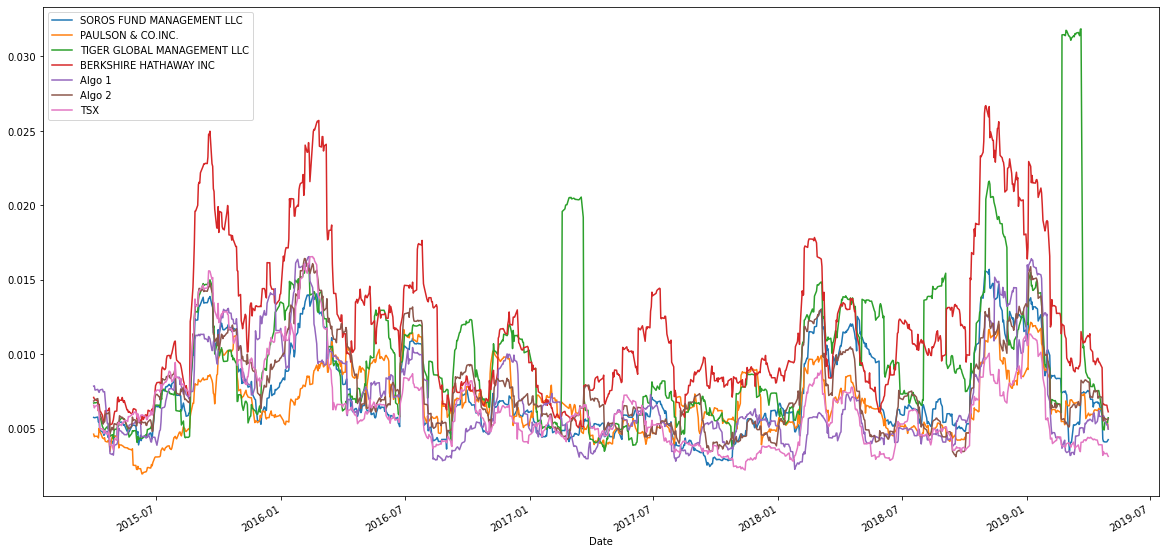

In [254]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_combined=combined_return.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_combined.plot(figsize=(20,10))

### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


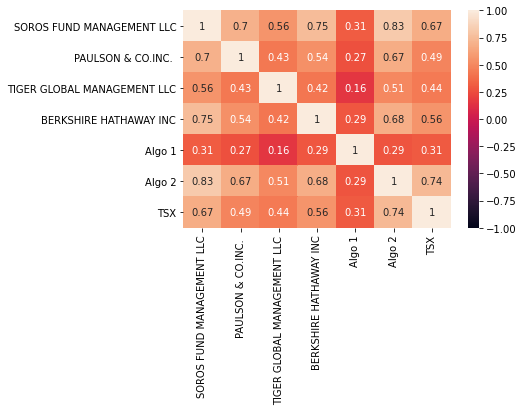

In [255]:
# Calculate the correlation
correlation=combined_return.corr()
# Display de correlation matrix
sns.heatmap(correlation,vmin=-1,vmax=1,annot=True)
correlation

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

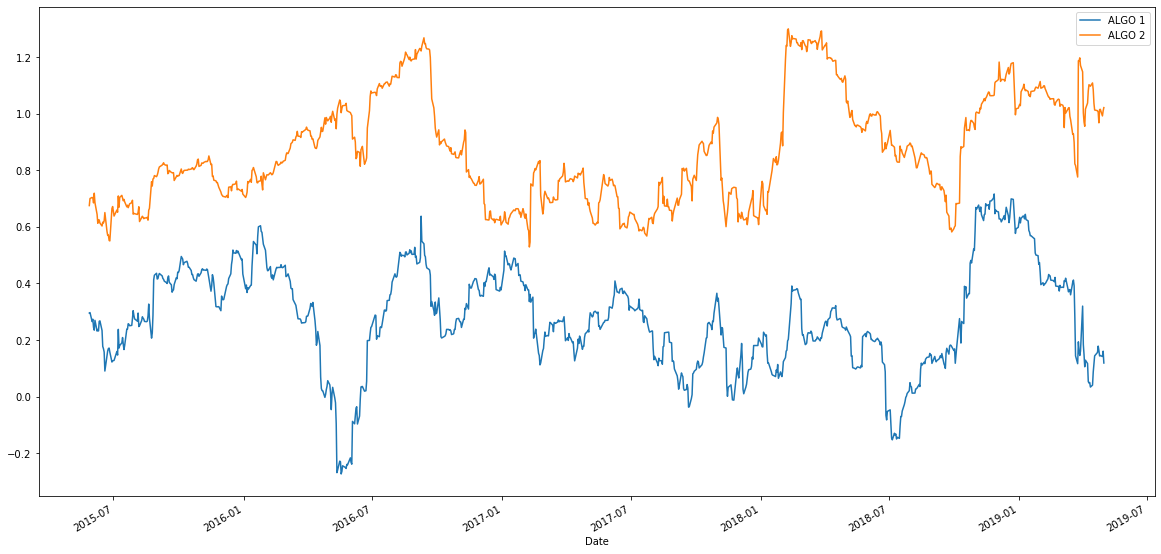

In [256]:
covariance_algo1=combined_return['Algo 1'].cov(combined_return['TSX'])
covariance_algo2=combined_return['Algo 2'].cov(combined_return['TSX'])
# Calculate variance of S&P TSX
variance=combined_return['TSX'].var()
# Computing beta
Beta1=covariance_algo1/variance
Beta2=covariance_algo2/variance
# Plot beta trend
rolling_covariance_algo1=combined_return['Algo 1'].rolling(window=60).cov(combined_return['TSX'])
rolling_covariance_algo2=combined_return['Algo 2'].rolling(window=60).cov(combined_return['TSX'])
rolling_variance=combined_return['TSX'].rolling(window=60).var()
rolling_beta_algo1=rolling_covariance_algo1/rolling_variance
rolling_beta_algo2=rolling_covariance_algo2/rolling_variance

ax=rolling_beta_algo1.plot(figsize=(20,10))
rolling_beta_algo2.plot()
ax.legend(['ALGO 1','ALGO 2'])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

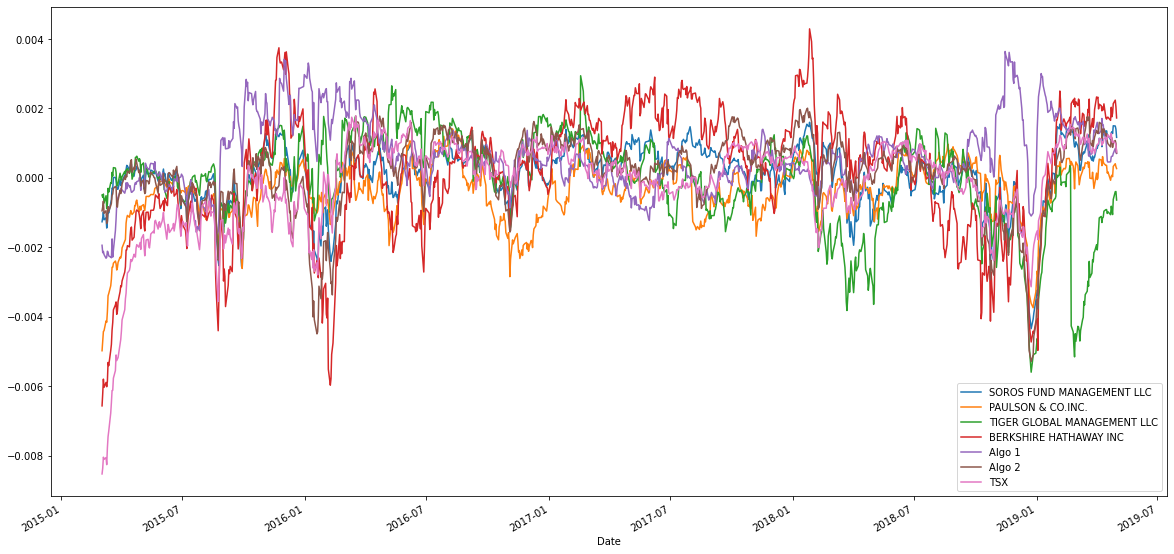

In [257]:
# Use `ewm` to calculate the rolling window

combined_return.ewm(halflife=21, adjust=False).mean().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [258]:
# Annualized Sharpe Ratios
sharp_ratios1=((combined_return.mean()*252)/(annualized_std))
sharp_ratios1

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
TSX                            0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratios'}>

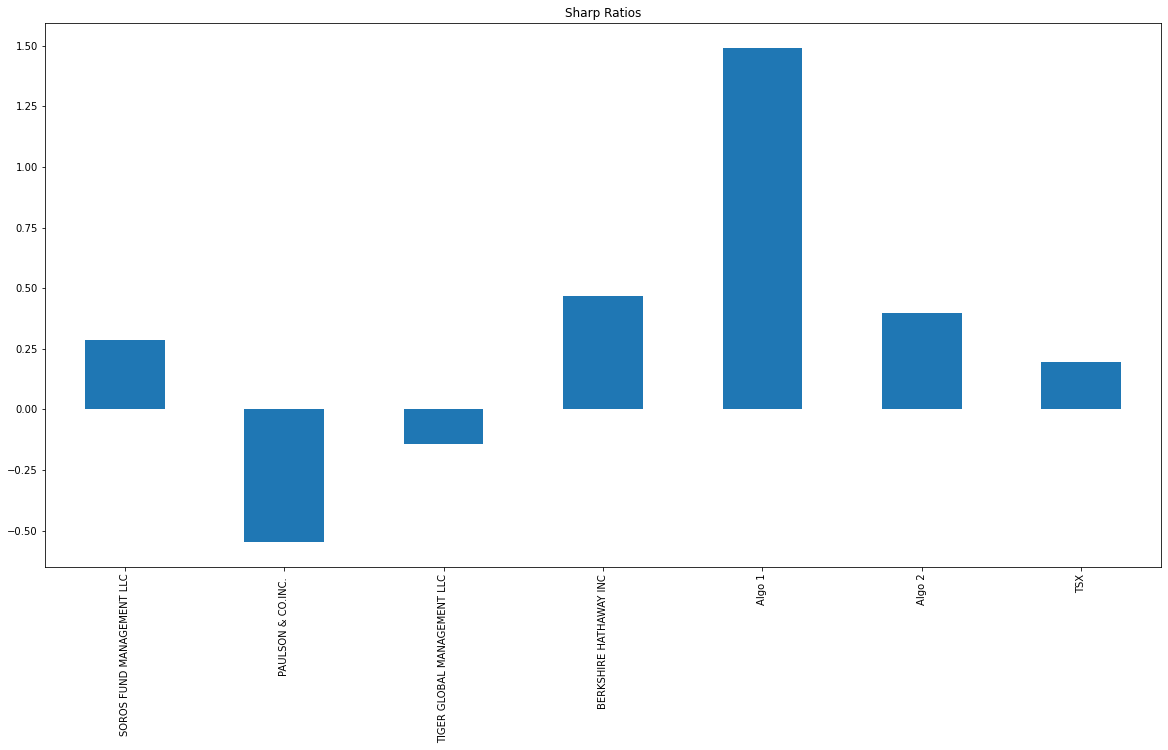

In [259]:
# Visualize the sharpe ratios as a bar plot
sharp_ratios1.plot(kind="bar",title="Sharp Ratios",figsize=(20,10))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

The algorithmic strategies outperform the market and the whales portfolios. Algo 1 has the highest sharp rations amongst the other stocks and least coorelated with the market which definitely outperforms the other stocks. Algo 2 outperforms the TSX and other stocks but the sharp ratio is less than Berkshire Hathway.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [260]:
# Reading data from 1st stock
csv_td=Path('TD.csv')
df_td=pd.read_csv(csv_td,index_col="Date",parse_dates=True,infer_datetime_format=True)
df_td.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,73.760002,73.970001,73.349998,73.709999,63.826797,2285200
2018-01-03,73.870003,74.379997,73.790001,74.169998,64.225128,4851700
2018-01-04,74.500000,74.849998,74.230003,74.790001,64.762009,2878800
2018-01-05,74.830002,74.980003,74.500000,74.900002,64.857254,3203100
2018-01-08,75.000000,75.209999,74.730003,74.730003,64.710037,3887200


In [261]:
# Reading data from 2nd stock
csv_enb=Path('ENB.csv')
df_enb=pd.read_csv(csv_enb,index_col="Date",parse_dates=True,infer_datetime_format=True)
df_enb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,49.349998,50.299999,49.110001,50.250000,39.940193,1921100
2018-01-03,50.500000,50.790001,50.040001,50.669998,40.274021,2077800
2018-01-04,50.880001,50.990002,50.689999,50.980000,40.520416,1862200
2018-01-05,50.900002,51.040001,50.320000,50.580002,40.202488,2030100
2018-01-08,50.689999,50.779999,50.439999,50.580002,40.202488,1335000


In [262]:
# Reading data from 3rd stock
csv_shop=Path('SHOP.csv')
df_shop=pd.read_csv(csv_shop,index_col="Date",parse_dates=True,infer_datetime_format=True)
df_shop.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,127.320000,132.229996,126.650002,132.059998,132.059998,251000
2018-01-03,133.270004,135.570007,133.119995,135.149994,135.149994,400200
2018-01-04,135.960007,137.740005,134.300003,137.460007,137.460007,409800
2018-01-05,137.470001,138.639999,135.000000,137.259995,137.259995,308600
2018-01-08,137.130005,139.929993,136.779999,139.509995,139.509995,182500


In [263]:
# Reading data from 4th stock
csv_hive=Path('HIVE.csv')
df_hive=pd.read_csv(csv_hive,index_col="Date",parse_dates=True,infer_datetime_format=True)
df_hive.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,3.50,3.59,3.46,3.59,3.59,1401500
2018-01-03,3.61,3.70,3.36,3.44,3.44,2093300
2018-01-04,3.40,3.43,3.21,3.29,3.29,1502400
2018-01-05,3.46,3.46,3.30,3.38,3.38,955700
2018-01-08,3.45,3.48,3.33,3.40,3.40,1505900


In [264]:
# Combine all stocks in a single DataFrame
df_concat1=pd.concat([df_td,df_enb,df_shop,df_hive],axis=1,join='inner')
df_concat1

,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,...,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,73.760002,73.970001,73.349998,73.709999,63.826797,2285200,49.349998,50.299999,49.110001,50.250000,...,126.650002,132.059998,132.059998,251000,3.500,3.590,3.460,3.590,3.590,1401500
2018-01-03,73.870003,74.379997,73.790001,74.169998,64.225128,4851700,50.500000,50.790001,50.040001,50.669998,...,133.119995,135.149994,135.149994,400200,3.610,3.700,3.360,3.440,3.440,2093300
2018-01-04,74.500000,74.849998,74.230003,74.790001,64.762009,2878800,50.880001,50.990002,50.689999,50.980000,...,134.300003,137.460007,137.460007,409800,3.400,3.430,3.210,3.290,3.290,1502400
2018-01-05,74.830002,74.980003,74.500000,74.900002,64.857254,3203100,50.900002,51.040001,50.320000,50.580002,...,135.000000,137.259995,137.259995,308600,3.460,3.460,3.300,3.380,3.380,955700
2018-01-08,75.000000,75.209999,74.730003,74.730003,64.710037,3887200,50.689999,50.779999,50.439999,50.580002,...,136.779999,139.509995,139.509995,182500,3.450,3.480,3.330,3.400,3.400,1505900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,73.980003,74.099998,73.419998,73.540001,68.618896,2141000,52.000000,52.099998,51.730000,52.049999,...,510.369995,511.619995,511.619995,243900,0.100,0.110,0.095,0.100,0.100,1892800
2019-12-24,73.510002,73.550003,73.059998,73.550003,68.628227,1262400,52.080002,52.090000,51.810001,52.080002,...,508.209991,525.390015,525.390015,125200,0.100,0.100,0.095,0.095,0.095,277800
2019-12-27,73.550003,73.699997,73.160004,73.389999,68.478928,1668300,52.090000,52.169998,51.650002,51.799999,...,528.000000,534.760010,534.760010,156400,0.100,0.120,0.095,0.105,0.105,1657500


In [265]:
# Dropping Columns
df_concat1.drop(columns=['Open','High','Low','Adj Close','Volume'],inplace=True)
df_concat1

,Close,Close,Close,Close
Date,,,,
2018-01-02,73.709999,50.250000,132.059998,3.590
2018-01-03,74.169998,50.669998,135.149994,3.440
2018-01-04,74.790001,50.980000,137.460007,3.290
2018-01-05,74.900002,50.580002,137.259995,3.380
2018-01-08,74.730003,50.580002,139.509995,3.400
...,...,...,...,...
2019-12-23,73.540001,52.049999,511.619995,0.100
2019-12-24,73.550003,52.080002,525.390015,0.095
2019-12-27,73.389999,51.799999,534.760010,0.105


In [266]:
# Reorganize portfolio data by having a column per symbol
df_concat1.columns=['TD','ENB','SHOP','HIVE']
df_concat1

,TD,ENB,SHOP,HIVE
Date,,,,
2018-01-02,73.709999,50.250000,132.059998,3.590
2018-01-03,74.169998,50.669998,135.149994,3.440
2018-01-04,74.790001,50.980000,137.460007,3.290
2018-01-05,74.900002,50.580002,137.259995,3.380
2018-01-08,74.730003,50.580002,139.509995,3.400
...,...,...,...,...
2019-12-23,73.540001,52.049999,511.619995,0.100
2019-12-24,73.550003,52.080002,525.390015,0.095
2019-12-27,73.389999,51.799999,534.760010,0.105


In [267]:
daily_returns_2=df_concat1.pct_change()
# Drop NAs
daily_returns_2.dropna(inplace=True)

# Display sample data
daily_returns_2

,TD,ENB,SHOP,HIVE
Date,,,,
2018-01-03,0.006241,0.008358,0.023398,-0.041783
2018-01-04,0.008359,0.006118,0.017092,-0.043605
2018-01-05,0.001471,-0.007846,-0.001455,0.027356
2018-01-08,-0.002270,0.000000,0.016392,0.005917
2018-01-09,-0.010705,-0.008106,-0.011254,-0.032353
...,...,...,...,...
2019-12-23,-0.004333,0.003083,-0.003118,0.052632
2019-12-24,0.000136,0.000576,0.026915,-0.050000
2019-12-27,-0.002175,-0.005376,0.017834,0.105263


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [268]:
weights = [0.25, 0.25, 0.25, 0.25]

# Calculate portfolio return
portfolio_returns=daily_returns_2.dot(weights)
# Display sample data
portfolio_returns.head()

Date
2018-01-03   -0.000946
2018-01-04   -0.003009
2018-01-05    0.004881
2018-01-08    0.005010
2018-01-09   -0.015604
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [269]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_concat_return=pd.concat([combined_return,portfolio_returns],axis=1,join='inner')
portfolio_concat_return=portfolio_concat_return.rename(columns={0:'MY Portfolio Returns'})
portfolio_concat_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX,MY Portfolio Returns
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,-0.000946
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,-0.003009
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.004881
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,0.005010
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.015604


In [270]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_concat_return.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
TSX                            0
MY Portfolio Returns           0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [271]:
# Calculate the annualized `std`
annualized_my_std=portfolio_concat_return.std()*np.sqrt(252)
annualized_my_std.sort_values()

TSX                            0.099121
PAULSON & CO.INC.              0.114343
Algo 1                         0.120028
Algo 2                         0.137664
SOROS FUND MANAGEMENT LLC      0.145675
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
MY Portfolio Returns           0.326458
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

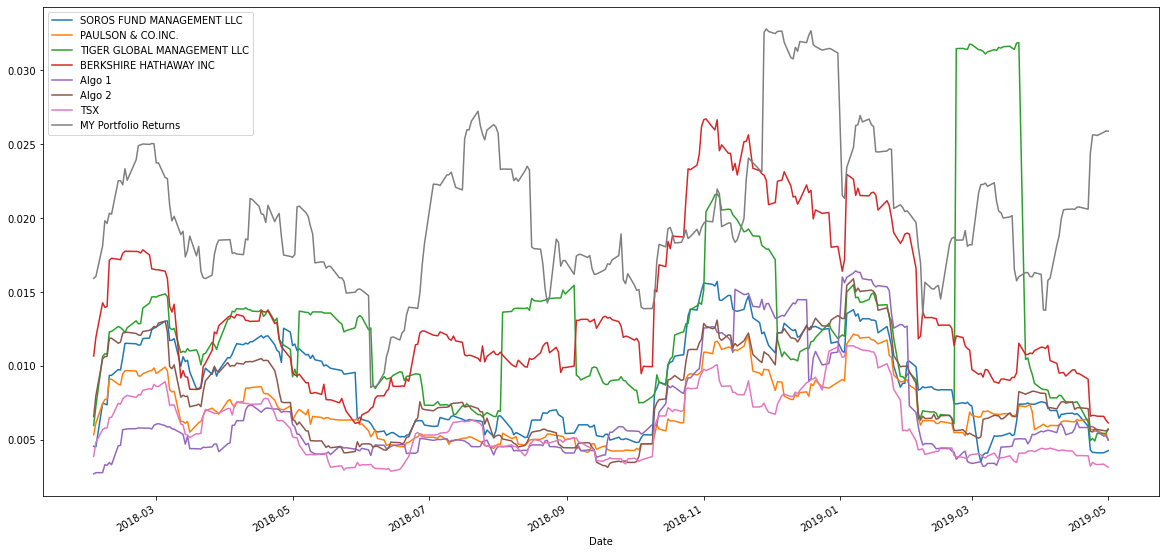

In [272]:
# Calculate rolling standard deviation
rolling_std_new=portfolio_concat_return.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std_new.plot(figsize=(20,10))

### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX,MY Portfolio Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.422528
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.356698
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.163922
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.452934
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.195440
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.435536
TSX,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.439621
MY Portfolio Returns,0.422528,0.356698,0.163922,0.452934,0.195440,0.435536,0.439621,1.000000


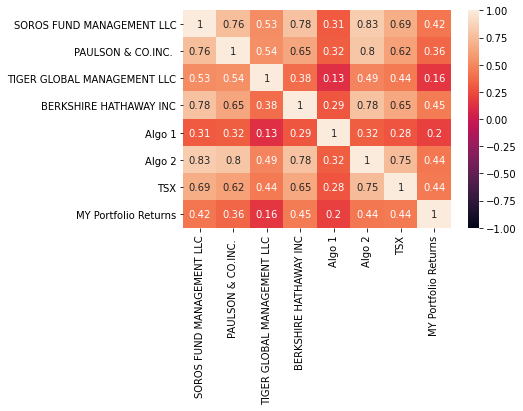

In [273]:
# Calculate and plot the correlation
import seaborn as sns
correlation_new=portfolio_concat_return.corr()
sns.heatmap(correlation_new,vmin=-1,vmax=1,annot=True)
correlation_new


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Beta of MY portfolio returns'}, xlabel='Date'>

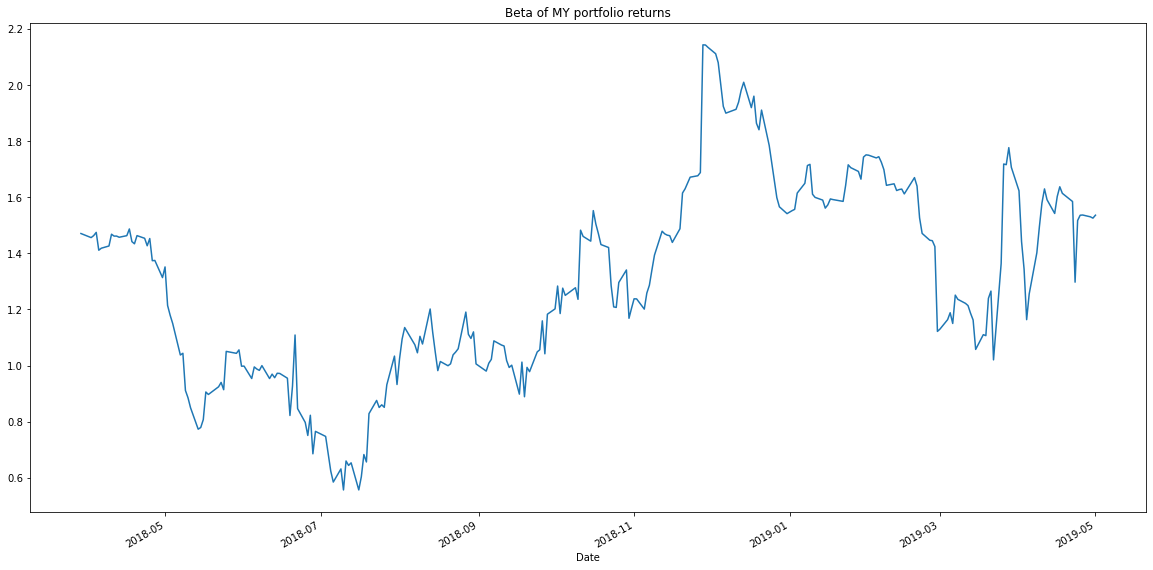

In [274]:

# Calculate and plot Beta
rolling_60day_cov=portfolio_concat_return["MY Portfolio Returns"].rolling(window=60).cov(portfolio_concat_return['TSX'])
rolling_60day_var=portfolio_concat_return['TSX'].rolling(window=60).var()
Beta_60_rolling=rolling_60day_cov/rolling_60day_var

#Beta_60_rolling.plot(figsize=(20,10))
Beta_60_rolling.plot(figsize=(20,10),title="Beta of MY portfolio returns")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [275]:
# Calculate Annualzied Sharpe Ratios
sharp_ratios2=((portfolio_concat_return.mean()*252)/(annualized_my_std))
sharp_ratios2.sort_values(ascending=False)

Algo 1                         1.901461
BERKSHIRE HATHAWAY INC         0.195907
TSX                            0.034651
Algo 2                         0.021394
MY Portfolio Returns          -0.010156
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratios'}>

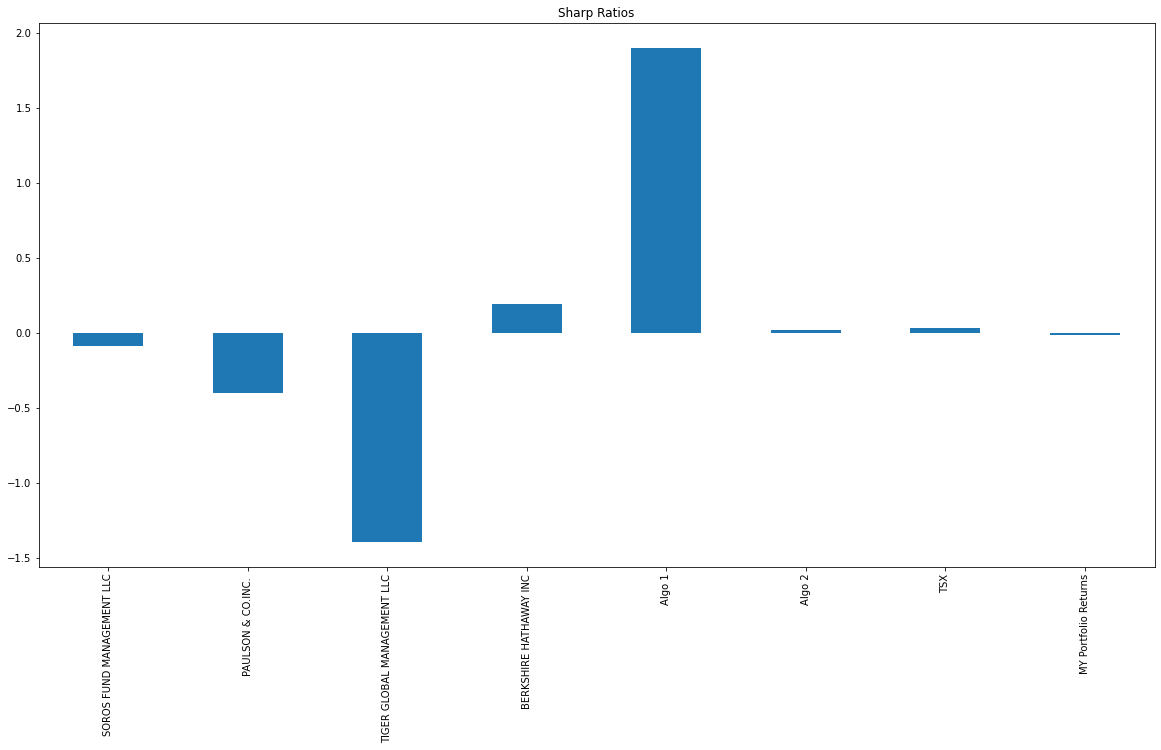

In [276]:
# Visualize the sharpe ratios as a bar plot
sharp_ratios2.plot(kind='bar',title="Sharp Ratios",figsize=(20,10))

### How does your portfolio do?

Write your answer here!

In [278]:
'''My portfolio outperms the Soros fund management, PAULSON CO INC. and TIGER GLOBAL MANAGEMENT LLC but could not outperform the Algo 1, Algo 2 , Berkshire Hathway and the benchmark S&P TSX
Moreover the annual standard deviation of my portfolio is highest amongst other stocks which means there are very high chances of risk'''

'My portfolio outperms the Soros fund management, PAULSON CO INC. and TIGER GLOBAL MANAGEMENT LLC but could not outperform the Algo 1, Algo 2 , Berkshire Hathway and the benchmark S&P TSX\nMoreover the annual standard deviation of my portfolio is highest amongst other stocks which means there are very high chances of risk'